In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

#Custom simple linear model.
class Model():
  def __init__(self):
    self.w = tf.Variable(5.0)
    self.b = tf.Variable(0.0)

  def __call__(self, inputs):
    return self.w * inputs + self.b
 

model = Model()

In [3]:
W_TRUE = 3.0 
B_TRUE = 4.0
M = 1000 

xs = np.random.randn(M)
ys = xs * W_TRUE + B_TRUE

In [4]:
def plot_data(inputs, outputs, predicted_outputs):
  real = plt.scatter(inputs, outputs, c="b")
  predicted = plt.scatter(inputs, predicted_outputs, c="r")
  plt.legend((real, predicted), ("True", "Predicted"))
  plt.show()

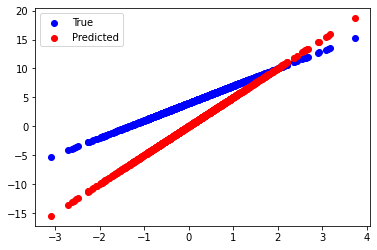

tf.Tensor(21.285149642181082, shape=(), dtype=float64)


In [5]:
#initial prediction without training. 
plot_data(xs, ys, model(xs))

print(loss_func(xs, ys))

In [6]:
#MSE Loss.
def loss_func(y_true, y_pred):
  return tf.reduce_mean(tf.square(y_true - y_pred))

In [7]:
#custom training loop.
def train(model, xs, ys, lr):
  with tf.GradientTape() as t:
    #ff 
    y_pred = model(xs)
    #loss 
    loss = loss_func(ys, y_pred)
    #gradients. 
    dw, db = t.gradient(loss, [model.w, model.b])
    #gradient update. 
    model.w.assign_sub(lr * dw)
    model.b.assign_sub(lr * db)
    print(f"Loss at this epoch {loss}")



In [12]:
#train for 15 epochs. 

model = Model()

for epoch in range(15):
  train(model, xs, ys, 0.75)

Loss at this epoch 18.519662857055664
Loss at this epoch 3.0699424743652344
Loss at this epoch 0.674660325050354
Loss at this epoch 0.19444559514522552
Loss at this epoch 0.06574598699808121
Loss at this epoch 0.023784933611750603
Loss at this epoch 0.008817062713205814
Loss at this epoch 0.003295605769380927
Loss at this epoch 0.0012351820478215814
Loss at this epoch 0.0004633654316421598
Loss at this epoch 0.0001738769351504743
Loss at this epoch 6.525310891447589e-05
Loss at this epoch 2.448833402013406e-05
Loss at this epoch 9.19132162380265e-06
Loss at this epoch 3.4499055345804663e-06


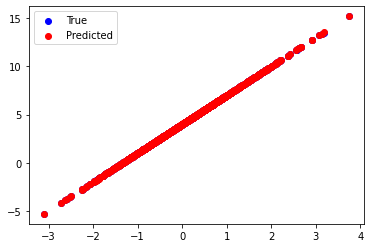

In [13]:
plot_data(xs, ys, model(xs))